In [65]:
import json
world_cup_str = """
[
    {
        "team_1": "France",
        "team_2": "Croatia",
        "game_type": "Final",
        "score" : [4, 2]
    },
    {
        "team_1": "Belgium",
        "team_2": "England",
        "game_type": "3rd/4th Playoff",
        "score" : [2, 0]
    }
]
"""
#load string
world_cup_obj = json.loads(world_cup_str)
print(type(world_cup_obj))
world_cup_obj

<class 'list'>


[{'team_1': 'France',
  'team_2': 'Croatia',
  'game_type': 'Final',
  'score': [4, 2]},
 {'team_1': 'Belgium',
  'team_2': 'England',
  'game_type': '3rd/4th Playoff',
  'score': [2, 0]}]

In [66]:
import json
file = open("hn_2014.json")
hn = json.load(file)

print(type(hn))

<class 'list'>


In [67]:
print(len(hn))
print(type(hn[0]))

35806
<class 'dict'>


In [68]:
hn[0].keys()

dict_keys(['author', 'numComments', 'points', 'url', 'storyText', 'createdAt', 'tags', 'createdAtI', 'title', 'objectId'])

In [69]:
hn[0]

{'author': 'dragongraphics',
 'numComments': 0,
 'points': 2,
 'url': 'http://ashleynolan.co.uk/blog/are-we-getting-too-sassy',
 'storyText': '',
 'createdAt': '2014-05-29T08:07:50Z',
 'tags': ['story', 'author_dragongraphics', 'story_7815238'],
 'createdAtI': 1401350870,
 'title': 'Are we getting too Sassy? Weighing up micro-optimisation vs. maintainability',
 'objectId': '7815238'}

In [70]:
def jprint(obj):
    # create a formatted string of the Python JSON object
    #dump string, opposite of load string (takes json obj, returns string)
    text = json.dumps(obj, sort_keys=True, indent=4)
    print(text)

In [71]:
first_story = hn[0]
jprint(first_story)

{
    "author": "dragongraphics",
    "createdAt": "2014-05-29T08:07:50Z",
    "createdAtI": 1401350870,
    "numComments": 0,
    "objectId": "7815238",
    "points": 2,
    "storyText": "",
    "tags": [
        "story",
        "author_dragongraphics",
        "story_7815238"
    ],
    "title": "Are we getting too Sassy? Weighing up micro-optimisation vs. maintainability",
    "url": "http://ashleynolan.co.uk/blog/are-we-getting-too-sassy"
}


# use del to delete a key from dictionary

In [72]:
def del_key(dict_, key):
    # create a copy so we don't
    # modify the original dict
    modified_dict = dict_.copy()
    del modified_dict[key]
    return modified_dict

In [73]:
#remove a key
first_story = del_key(first_story, 'createdAtI')
jprint(first_story)

{
    "author": "dragongraphics",
    "createdAt": "2014-05-29T08:07:50Z",
    "numComments": 0,
    "objectId": "7815238",
    "points": 2,
    "storyText": "",
    "tags": [
        "story",
        "author_dragongraphics",
        "story_7815238"
    ],
    "title": "Are we getting too Sassy? Weighing up micro-optimisation vs. maintainability",
    "url": "http://ashleynolan.co.uk/blog/are-we-getting-too-sassy"
}


In [74]:
hn_clean = []
for entry in hn:
    hn_clean.append(del_key(entry, 'createdAtI'))

In [75]:
hn_clean[0]

{'author': 'dragongraphics',
 'numComments': 0,
 'points': 2,
 'url': 'http://ashleynolan.co.uk/blog/are-we-getting-too-sassy',
 'storyText': '',
 'createdAt': '2014-05-29T08:07:50Z',
 'tags': ['story', 'author_dragongraphics', 'story_7815238'],
 'title': 'Are we getting too Sassy? Weighing up micro-optimisation vs. maintainability',
 'objectId': '7815238'}

# list comprehension: shorthand to cycle through a list

In [76]:
#shorthand way of doing the same as above
hn_clean1 = [del_key(d, 'createdAtI') for d in hn]

In [77]:
#creating a new list
import numpy as np
import pandas as pd
cols = ["col_{}".format(i) for i in range(1,5)]
data = np.zeros((4,4))

df = pd.DataFrame(data, columns=cols)
print(df)

   col_1  col_2  col_3  col_4
0    0.0    0.0    0.0    0.0
1    0.0    0.0    0.0    0.0
2    0.0    0.0    0.0    0.0
3    0.0    0.0    0.0    0.0


In [78]:
urls = [d['url'] for d in hn_clean]
urls

['http://ashleynolan.co.uk/blog/are-we-getting-too-sassy',
 'http://spectrum.ieee.org/automaton/robotics/home-robots/telemba-telepresence-robot',
 'http://online.wsj.com/articles/apple-to-buy-beats-1401308971',
 'http://alexsblog.org/2014/05/29/dont-wait-for-inspiration/',
 'http://techcrunch.com/2014/05/28/hackerone-get-9m-in-series-a-funding-to-build-bug-tracking-bounty-programs/',
 'http://www.teslamotors.com/en_AU/models/design',
 'http://gearapp.challengepost.com/',
 'https://gigaom.com/2014/05/28/skype-will-soon-get-real-time-speech-translation-based-on-deep-learning/',
 'http://www.nbcnews.com/feature/edward-snowden-interview/watch-primetime-special-inside-mind-edward-snowden-n117126',
 'http://snippetrepo.com/snippets/linear-equation-solver-in-3-lines-of-python',
 'http://www.quora.com/Websites/What-is-the-difference-between-a-privacy-policy-and-terms-and-conditions',
 'http://techcrunch.com/gallery/five-super-successful-tech-pivots/',
 'http://andrewgelman.com/2014/05/27/whole

In [79]:
thousand_points = [d for d in hn_clean if d['points'] > 1000]
num_thousand_points = len(thousand_points)
num_thousand_points

8

In [80]:
# use a 'key function' to define how to compare different elements (comparator)
def get_num_comments(d):
    return d['numComments']

most_comments = max(hn_clean, key=get_num_comments)
most_comments

{'author': 'platz',
 'numComments': 1208,
 'points': 889,
 'url': 'https://blog.mozilla.org/blog/2014/04/03/brendan-eich-steps-down-as-mozilla-ceo/',
 'storyText': None,
 'createdAt': '2014-04-03T19:02:53Z',
 'tags': ['story', 'author_platz', 'story_7525198'],
 'title': 'Brendan Eich Steps Down as Mozilla CEO',
 'objectId': '7525198'}

# lambda functions

In [81]:
plus_one = lambda x: x+1
add = lambda x, y: x+y

In [82]:
import re
#takes digits from a string, adds 1 to resultant integer
#just an example of a func that maybe too complex for lambda func to look nice
def extract_and_increment(string):
    digits = re.search(r"\d+", string).group()
    incremented = int(digits) + 1
    return incremented

In [83]:
balls = extract_and_increment('ef342ef')
balls

343

In [84]:
balls = re.search(r"\d+", 'ef34vc')
balls

<re.Match object; span=(2, 4), match='34'>

In [85]:
def multiply(a, b):
   return a * b

In [86]:
multiply = lambda a,b: a*b

In [87]:
hn_sorted_points = sorted(hn_clean, key=lambda d: d['points'], reverse=True)

top_5_titles = [d['title'] for d in hn_sorted_points[0:5]]

# convert list of dictionaries to pandas dataframe

In [88]:
json_df = pd.DataFrame(world_cup_obj)
print(json_df)

    team_1   team_2        game_type   score
0   France  Croatia            Final  [4, 2]
1  Belgium  England  3rd/4th Playoff  [2, 0]


In [89]:
hn_df = pd.DataFrame(hn_clean)
hn_df.head(3)

,author,numComments,points,url,storyText,createdAt,tags,title,objectId
0,dragongraphics,0,2,http://ashleynolan.co.uk/blog/are-we-getting-t...,,2014-05-29T08:07:50Z,"[story, author_dragongraphics, story_7815238]",Are we getting too Sassy? Weighing up micro-op...,7815238
1,jcr,0,1,http://spectrum.ieee.org/automaton/robotics/ho...,,2014-05-29T08:05:58Z,"[story, author_jcr, story_7815234]",Telemba Turns Your Old Roomba and Tablet Into ...,7815234
2,callum85,0,1,http://online.wsj.com/articles/apple-to-buy-be...,,2014-05-29T08:05:06Z,"[story, author_callum85, story_7815230]",Apple Agrees to Buy Beats for $3 Billion,7815230


In [90]:
tags = hn_df['tags']
print(tags.dtype)
type(tags[0])

object


list

In [91]:
#use series.apply() to apply a func to every item in a series
tags_types = tags.apply(type)
type_counts = tags_types.value_counts(dropna=False)
type_counts

<class 'list'>    35806
Name: tags, dtype: int64

In [92]:
tag_lengths = tags.apply(len).value_counts(dropna=False)
tag_lengths

3    33459
4     2347
Name: tags, dtype: int64

In [93]:
mybool = tags.apply(len) == 4
mybool

0        False
1        False
2        False
3        False
4        False
         ...  
35801    False
35802    False
35803    False
35804    False
35805    False
Name: tags, Length: 35806, dtype: bool

In [94]:
#get the tag entries that have length of 4
four_tags = tags[mybool]
four_tags

43       [story, author_alamgir_mand, story_7813869, sh...
86         [story, author_cweagans, story_7812404, ask_hn]
104      [story, author_nightstrike789, story_7812099, ...
107      [story, author_ISeemToBeAVerb, story_7812048, ...
109         [story, author_Swizec, story_7812018, show_hn]
                               ...                        
35747      [story, author_rpm4321, story_6994970, show_hn]
35759            [story, author_ct, story_6994828, ask_hn]
35778    [story, author_ChrisNorstrom, story_6994370, a...
35787    [story, author_benjamincburns, story_6994163, ...
35792      [story, author_randall, story_6993981, show_hn]
Name: tags, Length: 2347, dtype: object

In [95]:
#ternary operator, get the last value of a list if its length is 4
def extract_tag(l):
    return l[-1] if len(l) == 4 else None

In [96]:
cleaned_tags = tags.apply(extract_tag)
cleaned_tags[35778]

'ask_hn'

In [97]:
hn_df['tags'] = cleaned_tags
hn_df['tags'][35778:35784]

35778    ask_hn
35779      None
35780      None
35781      None
35782      None
35783      None
Name: tags, dtype: object

In [98]:
#using lambda function
#this does not run because tags is already cleaned
cleaned_tags1 = tags.apply(lambda l: l[-1] if len(l) == 4 else None)

TypeError: object of type 'NoneType' has no len()

# Working with missing data (next mission)

In [99]:
mvc = pd.read_csv("nypd_mvc_2018.csv")

In [100]:
mvc

,unique_key,date,time,borough,location,on_street,cross_street,off_street,pedestrians_injured,cyclist_injured,...,vehicle_1,vehicle_2,vehicle_3,vehicle_4,vehicle_5,cause_vehicle_1,cause_vehicle_2,cause_vehicle_3,cause_vehicle_4,cause_vehicle_5
0,3869058,2018-03-23,21:40,MANHATTAN,"(40.742832, -74.00771)",WEST 15 STREET,10 AVENUE,NaN,0,0,...,PASSENGER VEHICLE,NaN,NaN,NaN,NaN,Following Too Closely,Unspecified,NaN,NaN,NaN
1,3847947,2018-02-13,14:45,BROOKLYN,"(40.623714, -73.99314)",16 AVENUE,62 STREET,NaN,0,0,...,SPORT UTILITY / STATION WAGON,DS,NaN,NaN,NaN,Backing Unsafely,Unspecified,NaN,NaN,NaN
2,3914294,2018-06-04,0:00,NaN,"(40.591755, -73.9083)",BELT PARKWAY,NaN,NaN,0,0,...,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN,Following Too Closely,Unspecified,NaN,NaN,NaN
3,3915069,2018-06-05,6:36,QUEENS,"(40.73602, -73.87954)",GRAND AVENUE,VANLOON STREET,NaN,0,0,...,Sedan,Sedan,NaN,NaN,NaN,Glare,Passing Too Closely,NaN,NaN,NaN
4,3923123,2018-06-16,15:45,BRONX,"(40.884727, -73.89945)",NaN,NaN,208 WEST 238 STREET,0,0,...,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN,Turning Improperly,Unspecified,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57859,3835191,2018-01-26,14:51,BRONX,"(40.85477, -73.90299)",CRESTON AVENUE,EAST 181 STREET,NaN,3,0,...,PASSENGER VEHICLE,NaN,NaN,NaN,NaN,Unspecified,NaN,NaN,NaN,NaN
57860,3890674,2018-04-29,18:30,QUEENS,"(40.78419, -73.84582)",COLLEGE POINT BOULEVARD,15 AVENUE,NaN,0,0,...,PASSENGER VEHICLE,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN,Backing Unsafely,Unspecified,NaN,NaN,NaN
57861,3946458,2018-07-21,16:45,NaN,"(40.711926, -74.0061)",PARK ROW,NaN,NaN,0,0,...,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN,Turning Improperly,Unspecified,NaN,NaN,NaN
57862,3914574,2018-06-04,5:45,NaN,"(40.71976, -73.94476)",BROOKLYN QUEENS EXPRESSWAY,NaN,NaN,0,0,...,Sedan,Tractor Truck Diesel,Station Wagon/Sport Utility Vehicle,NaN,NaN,Other Vehicular,Unspecified,Unspecified,NaN,NaN


In [102]:
#dataframe with random null values
data = np.random.choice([1.0, np.nan],
                        size=(3, 3),
                        p=[.3, .7])
df = pd.DataFrame(data, columns=['A','B','C'])
print(df)

     A   B    C
0  NaN NaN  NaN
1  1.0 NaN  NaN
2  1.0 NaN  1.0


In [103]:
print(df.isnull())

       A     B      C
0   True  True   True
1  False  True   True
2  False  True  False


In [104]:
df.isnull().sum()

A    1
B    3
C    2
dtype: int64

In [105]:
null_counts = mvc.isnull().sum()
null_counts

unique_key                 0
date                       0
time                       0
borough                20646
location                3885
on_street              13961
cross_street           29249
off_street             44093
pedestrians_injured        0
cyclist_injured            0
motorist_injured           0
total_injured              1
pedestrians_killed         0
cyclist_killed             0
motorist_killed            0
total_killed               5
vehicle_1                355
vehicle_2              12262
vehicle_3              54352
vehicle_4              57158
vehicle_5              57681
cause_vehicle_1          175
cause_vehicle_2         8692
cause_vehicle_3        54134
cause_vehicle_4        57111
cause_vehicle_5        57671
dtype: int64

In [106]:
null_counts_pct = null_counts / mvc.shape[0] * 100
null_counts_pct

unique_key              0.000000
date                    0.000000
time                    0.000000
borough                35.680216
location                6.714019
on_street              24.127264
cross_street           50.547836
off_street             76.201092
pedestrians_injured     0.000000
cyclist_injured         0.000000
motorist_injured        0.000000
total_injured           0.001728
pedestrians_killed      0.000000
cyclist_killed          0.000000
motorist_killed         0.000000
total_killed            0.008641
vehicle_1               0.613508
vehicle_2              21.191069
vehicle_3              93.930596
vehicle_4              98.779898
vehicle_5              99.683741
cause_vehicle_1         0.302433
cause_vehicle_2        15.021430
cause_vehicle_3        93.553850
cause_vehicle_4        98.698673
cause_vehicle_5        99.666459
dtype: float64

In [108]:
null_df = pd.DataFrame({'null_counts': null_counts, 'null_pct': null_counts_pct})
null_df

,null_counts,null_pct
unique_key,0,0.000000
date,0,0.000000
time,0,0.000000
borough,20646,35.680216
location,3885,6.714019
on_street,13961,24.127264
cross_street,29249,50.547836
off_street,44093,76.201092
pedestrians_injured,0,0.000000
cyclist_injured,0,0.000000


In [111]:
# Rotate the dataframe so that rows become columns and vice-versa
null_df = null_df.T.astype(int)
print(null_df)

             unique_key  date  time  borough  location  on_street  \
null_counts           0     0     0    20646      3885      13961   
null_pct              0     0     0       35         6         24   

             cross_street  off_street  pedestrians_injured  cyclist_injured  \
null_counts         29249       44093                    0                0   
null_pct               50          76                    0                0   

             ...  vehicle_1  vehicle_2  vehicle_3  vehicle_4  vehicle_5  \
null_counts  ...        355      12262      54352      57158      57681   
null_pct     ...          0         21         93         98         99   

             cause_vehicle_1  cause_vehicle_2  cause_vehicle_3  \
null_counts              175             8692            54134   
null_pct                   0               15               93   

             cause_vehicle_4  cause_vehicle_5  
null_counts            57111            57671  
null_pct                  98     

In [113]:
killed_cols = [col for col in mvc.columns if 'killed' in col]
null_df[killed_cols]

,pedestrians_killed,cyclist_killed,motorist_killed,total_killed
null_counts,0,0,0,5
null_pct,0,0,0,0


In [114]:
killed_cols = [col for col in mvc.columns if 'killed' in col]
killed = mvc[killed_cols].copy()
killed

,pedestrians_killed,cyclist_killed,motorist_killed,total_killed
0,0,0,0,0.0
1,0,0,0,0.0
2,0,0,0,0.0
3,0,0,0,0.0
4,0,0,0,0.0
...,...,...,...,...
57859,0,0,0,0.0
57860,0,0,0,0.0
57861,0,0,0,0.0
57862,0,0,0,0.0


In [118]:
killed_manual_sum = killed['pedestrians_killed'] + killed['cyclist_killed'] + killed['motorist_killed']
killed_manual_sum

0        0
1        0
2        0
3        0
4        0
        ..
57859    0
57860    0
57861    0
57862    0
57863    0
Length: 57864, dtype: int64

In [119]:
killed_mask = killed['total_killed'] != killed_manual_sum
killed_mask

0        False
1        False
2        False
3        False
4        False
         ...  
57859    False
57860    False
57861    False
57862    False
57863    False
Length: 57864, dtype: bool

In [121]:
killed_non_eq = killed[killed_mask]
killed_non_eq

,pedestrians_killed,cyclist_killed,motorist_killed,total_killed
3508,0,0,0,NaN
20163,0,0,0,NaN
22046,0,0,1,0.0
48719,0,0,0,NaN
55148,0,0,0,NaN
55699,0,0,0,NaN


# Series.mask(): replace certain values based off a boolean mask

In [122]:
killed['total_killed'] = killed['total_killed'].mask(killed_mask, killed_manual_sum)

In [124]:
killed[killed_mask]

,pedestrians_killed,cyclist_killed,motorist_killed,total_killed
3508,0,0,0,0.0
20163,0,0,0,0.0
22046,0,0,1,1.0
48719,0,0,0,0.0
55148,0,0,0,0.0
55699,0,0,0,0.0


In [126]:
#flag this data, it may be suspicious
killed.iloc[22046, 3] = np.nan

In [127]:
killed[killed_mask]

,pedestrians_killed,cyclist_killed,motorist_killed,total_killed
3508,0,0,0,0.0
20163,0,0,0,0.0
22046,0,0,1,NaN
48719,0,0,0,0.0
55148,0,0,0,0.0
55699,0,0,0,0.0


In [130]:
# Create an injured dataframe and manually sum values
injured = mvc[[col for col in mvc.columns if 'injured' in col]].copy()
injured_manual_sum = injured.iloc[:,:3].sum(axis=1)
injured

,pedestrians_injured,cyclist_injured,motorist_injured,total_injured
0,0,0,0,0.0
1,0,0,0,0.0
2,0,0,1,1.0
3,0,0,0,0.0
4,0,0,0,0.0
...,...,...,...,...
57859,3,0,0,3.0
57860,0,0,0,0.0
57861,0,0,1,1.0
57862,0,0,0,0.0


In [132]:
injured_mask = injured_manual_sum != injured['total_injured']
injured[injured_mask]

,pedestrians_injured,cyclist_injured,motorist_injured,total_injured
1222,0,0,1,0.0
3263,0,0,3,4.0
3362,0,0,0,1.0
3508,0,0,0,2.0
10989,0,0,0,1.0
12885,1,0,0,0.0
13344,0,0,0,1.0
15213,0,0,0,2.0
20163,0,0,0,1.0
20978,0,0,0,1.0


In [135]:
injured['total_injured'] = injured['total_injured'].mask(injured_mask, np.nan)
injured[injured_mask]

,pedestrians_injured,cyclist_injured,motorist_injured,total_injured
1222,0,0,1,NaN
3263,0,0,3,NaN
3362,0,0,0,NaN
3508,0,0,0,NaN
10989,0,0,0,NaN
12885,1,0,0,NaN
13344,0,0,0,NaN
15213,0,0,0,NaN
20163,0,0,0,NaN
20978,0,0,0,NaN


In [136]:
summary = {
    'injured': [
        mvc['total_injured'].isnull().sum(),
        injured['total_injured'].isnull().sum()
    ],
    'killed': [
        mvc['total_killed'].isnull().sum(),
        killed['total_killed'].isnull().sum()
    ]
}
print(pd.DataFrame(summary, index=['before','after']))

        injured  killed
before        1       5
after        22       1


In [137]:
mvc['total_injured'] = injured['total_injured']
mvc['total_killed'] = killed['total_killed']

In [143]:
import matplotlib.pyplot as plt
import seaborn as sns
def plot_null_matrix(df, figsize=(18,15)):
    # initiate the figure
    plt.figure(figsize=figsize)
    # create a boolean dataframe based on whether values are null
    df_null = df.isnull()
    # create a heatmap of the boolean dataframe
    sns.heatmap(~df_null, cbar=False, yticklabels=False)
    plt.xticks(rotation=90, size='x-large')
    plt.show()

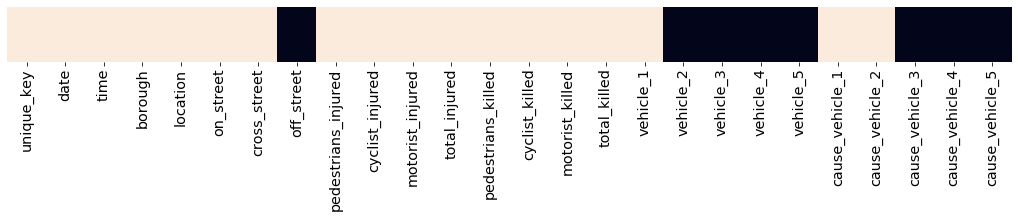

In [144]:
plot_null_matrix(mvc.head(1), figsize=(18,1))

In [145]:
mvc.head(1)

,unique_key,date,time,borough,location,on_street,cross_street,off_street,pedestrians_injured,cyclist_injured,...,vehicle_1,vehicle_2,vehicle_3,vehicle_4,vehicle_5,cause_vehicle_1,cause_vehicle_2,cause_vehicle_3,cause_vehicle_4,cause_vehicle_5
0,3869058,2018-03-23,21:40,MANHATTAN,"(40.742832, -74.00771)",WEST 15 STREET,10 AVENUE,NaN,0,0,...,PASSENGER VEHICLE,NaN,NaN,NaN,NaN,Following Too Closely,Unspecified,NaN,NaN,NaN


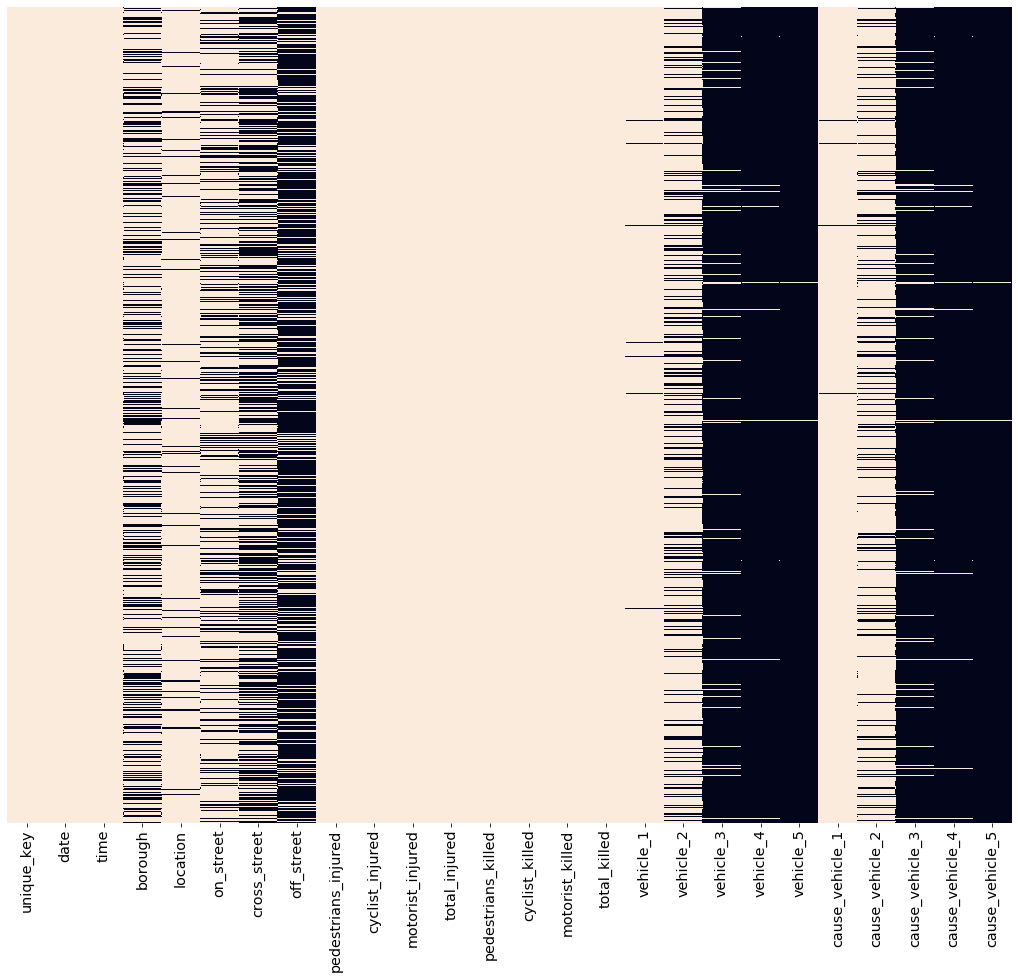

In [146]:
#null values are black
plot_null_matrix(mvc)

# correlation: calculating the relationship between 2 sets of columns

In [147]:
cols_with_missing_vals = mvc.columns[mvc.isnull().sum() > 0]

In [148]:
missing_corr = mvc[cols_with_missing_vals].isnull().corr()
missing_corr

,borough,location,on_street,cross_street,off_street,total_injured,total_killed,vehicle_1,vehicle_2,vehicle_3,vehicle_4,vehicle_5,cause_vehicle_1,cause_vehicle_2,cause_vehicle_3,cause_vehicle_4,cause_vehicle_5
borough,1.000000,0.190105,-0.350190,0.409107,0.362189,-0.003423,0.005582,-0.018325,-0.077516,-0.061932,-0.020406,-0.010733,-0.012115,-0.058596,-0.060542,-0.020158,-0.011348
location,0.190105,1.000000,-0.073975,-0.069719,0.084579,-0.001690,0.015496,-0.010466,-0.033842,-0.000927,0.004655,-0.005797,-0.003458,-0.021373,0.000684,0.004604,-0.004841
on_street,-0.350190,-0.073975,1.000000,0.557767,-0.991030,0.007649,-0.002344,-0.001889,0.119647,0.020867,0.004172,-0.002768,0.001307,0.087374,0.017426,0.002737,-0.003107
cross_street,0.409107,-0.069719,0.557767,1.000000,-0.552763,0.003332,0.004112,-0.017018,0.043799,-0.049910,-0.021137,-0.012003,-0.009102,0.031189,-0.052159,-0.022074,-0.013455
off_street,0.362189,0.084579,-0.991030,-0.552763,1.000000,-0.005754,0.002323,0.001812,-0.121129,-0.022404,-0.004074,0.002492,-0.001738,-0.088187,-0.019120,-0.002580,0.002863
total_injured,-0.003423,-0.001690,0.007649,0.003332,-0.005754,1.000000,-0.000081,0.077936,0.026764,-0.002468,0.002167,0.001098,0.128077,0.031499,-0.002100,0.002239,0.001128
total_killed,0.005582,0.015496,-0.002344,0.004112,0.002323,-0.000081,1.000000,-0.000327,0.008017,0.001057,0.000462,0.000234,-0.000229,0.009888,0.001091,0.000477,0.000240
vehicle_1,-0.018325,-0.010466,-0.001889,-0.017018,0.001812,0.077936,-0.000327,1.000000,0.151516,0.019972,0.008732,0.004425,0.604281,0.180678,0.020624,0.009022,0.004545
vehicle_2,-0.077516,-0.033842,0.119647,0.043799,-0.121129,0.026764,0.008017,0.151516,1.000000,0.131813,0.057631,0.029208,0.106214,0.784402,0.132499,0.058050,0.029264
vehicle_3,-0.061932,-0.000927,0.020867,-0.049910,-0.022404,-0.002468,0.001057,0.019972,0.131813,1.000000,0.437214,0.221585,0.014000,0.106874,0.961316,0.448525,0.225067


In [149]:
def plot_null_correlations(df):
    # create a correlation matrix only for columns with at least
    # one missing value
    cols_with_missing_vals = df.columns[df.isnull().sum() > 0]
    missing_corr = df[cols_with_missing_vals].isnull().corr()
    
    # create a mask to avoid repeated values and make
    # the plot easier to read
    missing_corr = missing_corr.iloc[1:, :-1]
    mask = np.triu(np.ones_like(missing_corr), k=1)
    
    # plot a heatmap of the values
    plt.figure(figsize=(20,14))
    ax = sns.heatmap(missing_corr, vmin=-1, vmax=1, cbar=False,
                     cmap='RdBu', mask=mask, annot=True)
    
    # format the text in the plot to make it easier to read
    for text in ax.texts:
        t = float(text.get_text())
        if -0.05 < t < 0.01:
            text.set_text('')
        else:
            text.set_text(round(t, 2))
        text.set_fontsize('x-large')
    plt.xticks(rotation=90, size='x-large')
    plt.yticks(rotation=0, size='x-large')

    plt.show()

In [154]:
vehicle_cols = [col for col in mvc.columns if 'vehicle' in col] 
vehicle_cols

['vehicle_1',
 'vehicle_2',
 'vehicle_3',
 'vehicle_4',
 'vehicle_5',
 'cause_vehicle_1',
 'cause_vehicle_2',
 'cause_vehicle_3',
 'cause_vehicle_4',
 'cause_vehicle_5']

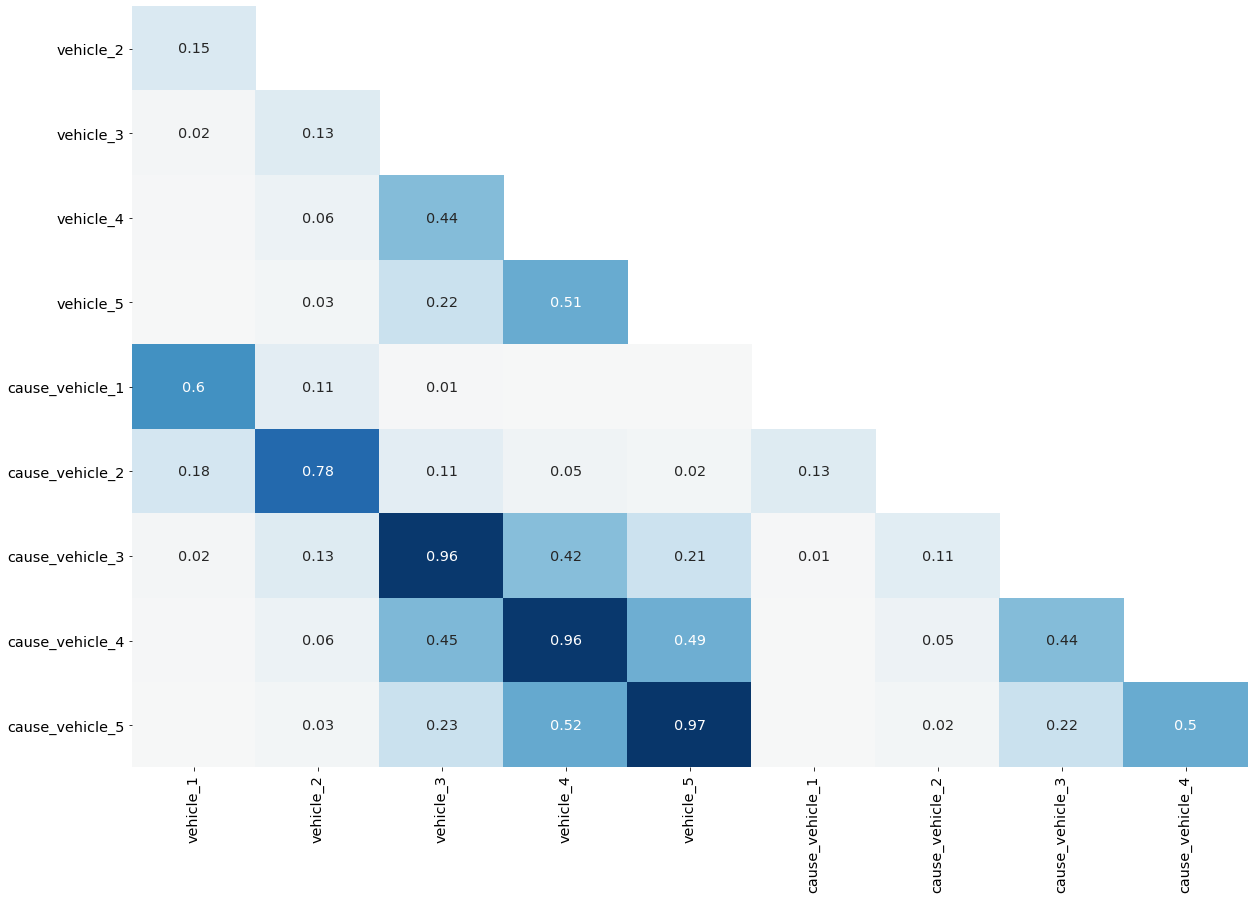

In [155]:
plot_null_correlations(mvc[vehicle_cols])

In [156]:
#make a df showing num of null vals for vehicle (if cause not null) and vice versa 
vc_null_data = []

for v in range(1,6):
    v_col = 'vehicle_{}'.format(v)
    c_col = 'cause_vehicle_{}'.format(v)
    v_null = (mvc[v_col].isnull() & mvc[c_col].notnull()).sum()
    c_null = (mvc[c_col].isnull() & mvc[v_col].notnull()).sum()
    vc_null_data.append([v, v_null, c_null])

In [158]:
col_labels = ['v_number', 'vehicle_missing', 'cause_missing']
vc_null_df = pd.DataFrame(vc_null_data, columns=col_labels)
vc_null_df

,v_number,vehicle_missing,cause_missing
0,1,204,24
1,2,3793,223
2,3,242,24
3,4,50,3
4,5,10,0


# use df.stack() to make it into a series object

In [160]:
cause_cols = [c for c in mvc.columns if "cause_" in c]
cause = mvc[cause_cols]
cause.head()

,cause_vehicle_1,cause_vehicle_2,cause_vehicle_3,cause_vehicle_4,cause_vehicle_5
0,Following Too Closely,Unspecified,NaN,NaN,NaN
1,Backing Unsafely,Unspecified,NaN,NaN,NaN
2,Following Too Closely,Unspecified,NaN,NaN,NaN
3,Glare,Passing Too Closely,NaN,NaN,NaN
4,Turning Improperly,Unspecified,NaN,NaN,NaN


In [161]:
#omits null values
cause_1d = cause.stack()
cause_1d.head()

0  cause_vehicle_1    Following Too Closely
   cause_vehicle_2              Unspecified
1  cause_vehicle_1         Backing Unsafely
   cause_vehicle_2              Unspecified
2  cause_vehicle_1    Following Too Closely
dtype: object

In [162]:
cause_counts = cause_1d.value_counts()
top10_causes = cause_counts.head(10)
top10_causes

Unspecified                       57481
Driver Inattention/Distraction    17650
Following Too Closely              6567
Failure to Yield Right-of-Way      4566
Passing or Lane Usage Improper     3260
Passing Too Closely                3045
Backing Unsafely                   3001
Other Vehicular                    2523
Unsafe Lane Changing               2372
Turning Improperly                 1590
dtype: int64

In [164]:
v_cols = [c for c in mvc.columns if c.startswith('vehicle')]
v_cols

['vehicle_1', 'vehicle_2', 'vehicle_3', 'vehicle_4', 'vehicle_5']

In [168]:
mvc[v_cols].head()

,vehicle_1,vehicle_2,vehicle_3,vehicle_4,vehicle_5
0,PASSENGER VEHICLE,NaN,NaN,NaN,NaN
1,SPORT UTILITY / STATION WAGON,DS,NaN,NaN,NaN
2,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN
3,Sedan,Sedan,NaN,NaN,NaN
4,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN


In [167]:
stacked = mvc[v_cols].stack()
stacked.head()

0  vehicle_1                      PASSENGER VEHICLE
1  vehicle_1          SPORT UTILITY / STATION WAGON
   vehicle_2                                     DS
2  vehicle_1    Station Wagon/Sport Utility Vehicle
   vehicle_2                                  Sedan
dtype: object

In [170]:
top10_vehicles = stacked.value_counts().head(10)
top10_vehicles

Sedan                                  33133
Station Wagon/Sport Utility Vehicle    26124
PASSENGER VEHICLE                      16026
SPORT UTILITY / STATION WAGON          12356
Taxi                                    3482
Pick-up Truck                           2373
TAXI                                    1892
Box Truck                               1659
Bike                                    1190
Bus                                     1162
dtype: int64

In [171]:
def summarize_missing():
    v_missing_data = []

    for v in range(1,6):
        v_col = 'vehicle_{}'.format(v)
        c_col = 'cause_vehicle_{}'.format(v)

        v_missing = (mvc[v_col].isnull() & mvc[c_col].notnull()).sum()
        c_missing = (mvc[c_col].isnull() & mvc[v_col].notnull()).sum()

        v_missing_data.append([v, v_missing, c_missing])

    col_labels = columns=["vehicle_number", "vehicle_missing", "cause_missing"]
    return pd.DataFrame(v_missing_data, columns=col_labels)

summary_before = summarize_missing()
summary_before

,vehicle_number,vehicle_missing,cause_missing
0,1,204,24
1,2,3793,223
2,3,242,24
3,4,50,3
4,5,10,0


In [173]:
for v in range(1,6):
    v_col = 'vehicle_{}'.format(v)
    c_col = 'cause_vehicle_{}'.format(v)
    v_null_bool = mvc[v_col].isnull() & mvc[c_col].notnull()
    c_null_bool = mvc[c_col].isnull() & mvc[v_col].notnull()
    mvc[v_col] = mvc[v_col].mask(v_null_bool,'Unspecified')
    mvc[c_col] = mvc[c_col].mask(c_null_bool,'Unspecified')


In [174]:
summary_after = summarize_missing()
summary_after

,vehicle_number,vehicle_missing,cause_missing
0,1,0,0
1,2,0,0
2,3,0,0
3,4,0,0
4,5,0,0


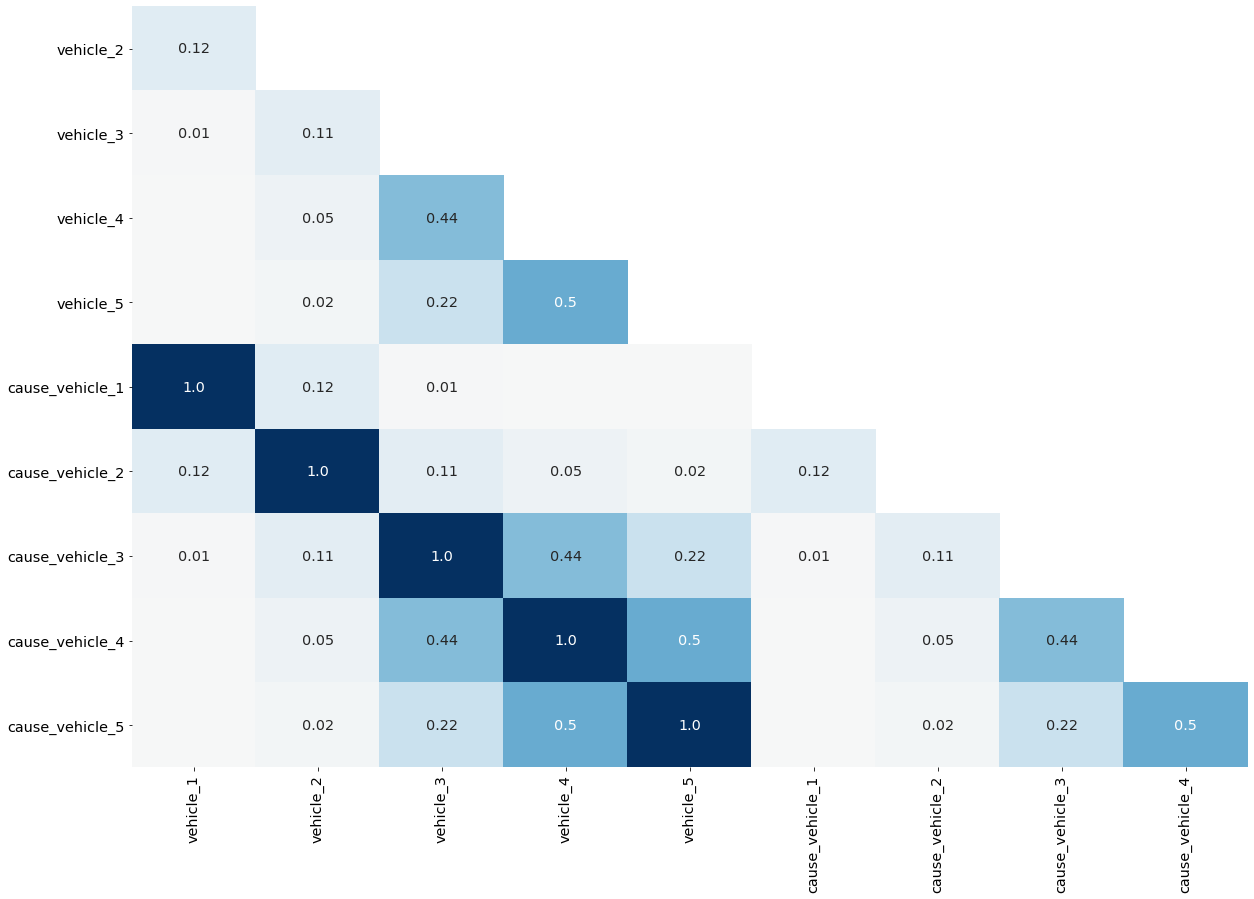

In [175]:
veh_cols = [c for c in mvc.columns if 'vehicle' in c]
plot_null_correlations(mvc[veh_cols])

In [177]:
loc_cols = ['borough', 'location', 'on_street', 'off_street', 'cross_street']
location_data = mvc[loc_cols]
location_data.head()

,borough,location,on_street,off_street,cross_street
0,MANHATTAN,"(40.742832, -74.00771)",WEST 15 STREET,NaN,10 AVENUE
1,BROOKLYN,"(40.623714, -73.99314)",16 AVENUE,NaN,62 STREET
2,NaN,"(40.591755, -73.9083)",BELT PARKWAY,NaN,NaN
3,QUEENS,"(40.73602, -73.87954)",GRAND AVENUE,NaN,VANLOON STREET
4,BRONX,"(40.884727, -73.89945)",NaN,208 WEST 238 STREET,NaN


In [183]:
location_data.sort_values(loc_cols)

,borough,location,on_street,off_street,cross_street
4195,BRONX,"(40.543148, -74.147026)",NaN,4278 3 AVENUE,NaN
28739,BRONX,"(40.597343, -74.07097)",EAST 183 STREET,NaN,VALENTINE AVENUE
1222,BRONX,"(40.666126, -73.82518)",JEROME AVENUE,NaN,EAST MOUNT EDEN AVENUE
51319,BRONX,"(40.70715, -73.906586)",NaN,3989 SAXON AVENUE,NaN
47683,BRONX,"(40.71259, -73.81541)",NaN,875 MORRISON AVENUE,NaN
...,...,...,...,...,...
54230,NaN,NaN,NaN,NaN,NaN
54885,NaN,NaN,NaN,NaN,NaN
55580,NaN,NaN,NaN,NaN,NaN
56407,NaN,NaN,NaN,NaN,NaN


In [179]:
location_data.isnull().sum()

borough         20646
location         3885
on_street       13961
off_street      44093
cross_street    29249
dtype: int64

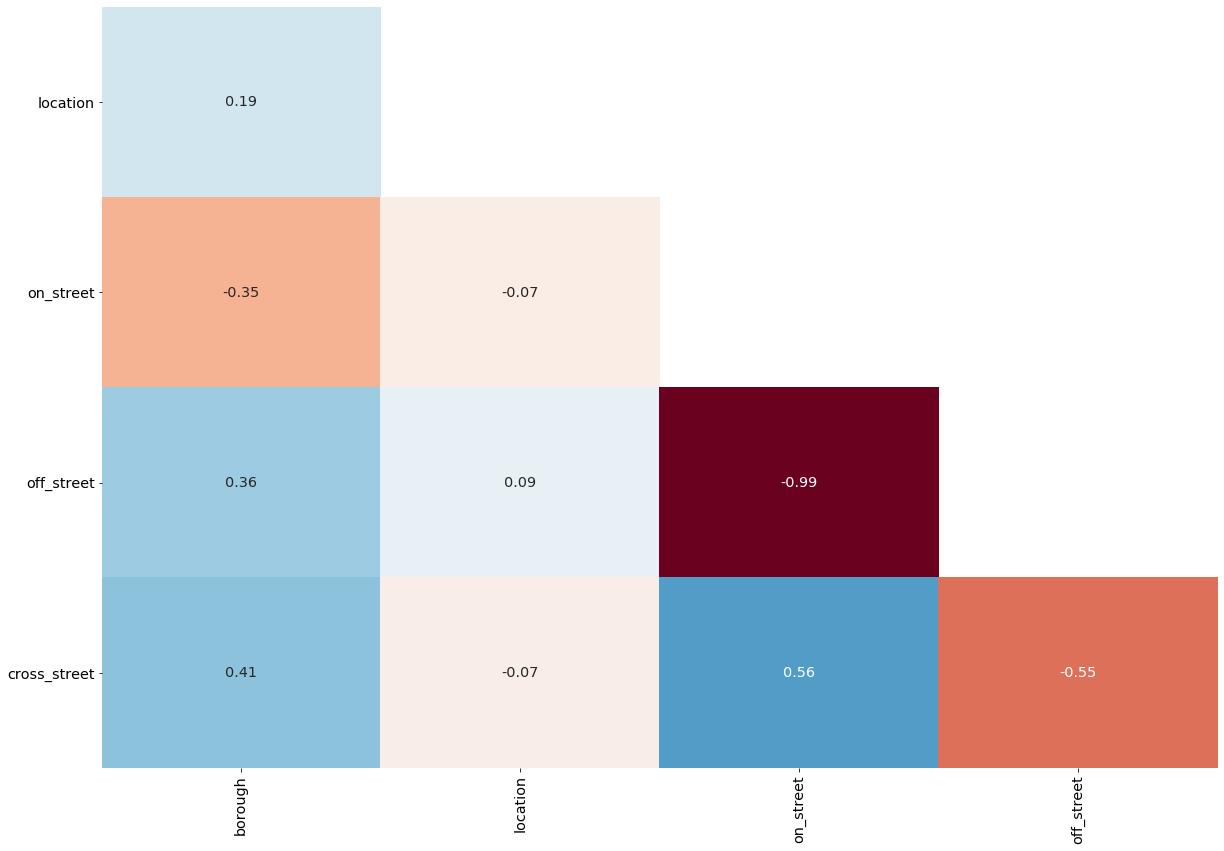

In [180]:
plot_null_correlations(location_data)

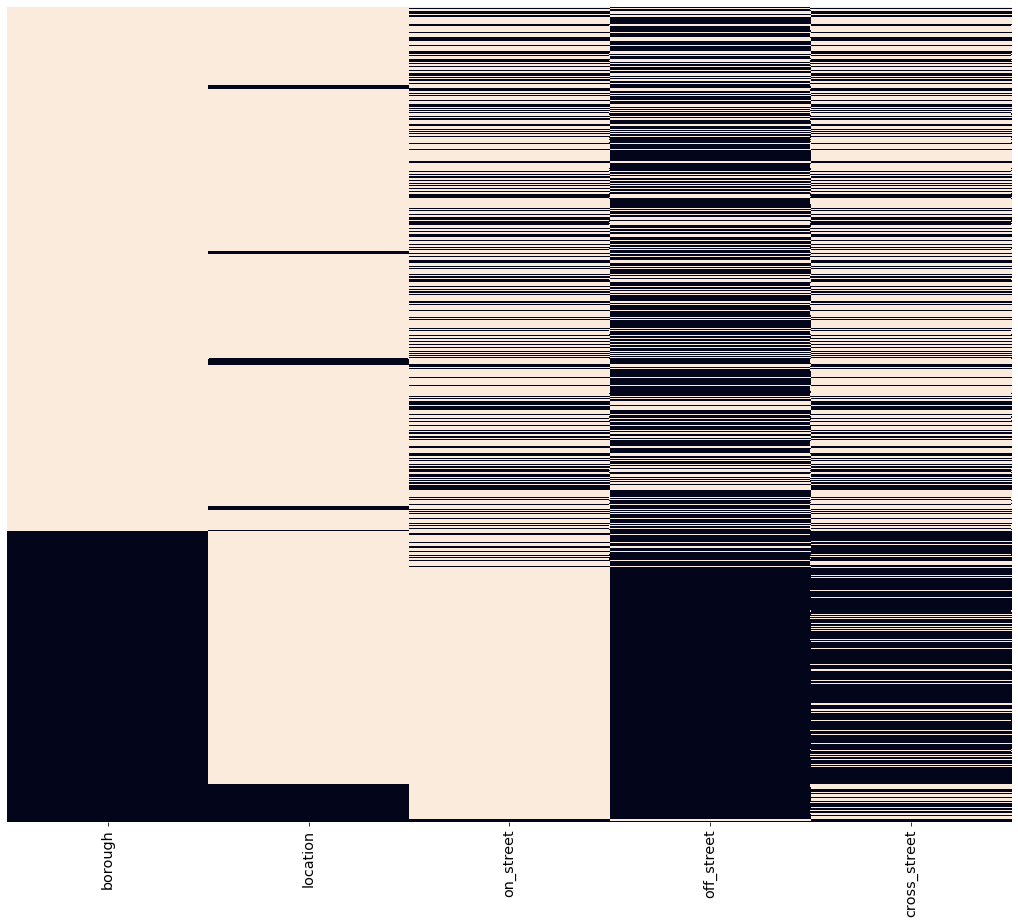

In [181]:
#null values are black
sorted_location_data = location_data.sort_values(loc_cols)
plot_null_matrix(sorted_location_data)

In [188]:
#this supplemental data is provided from dataquest using google maps geolocation api
sup_data = pd.read_csv('supplemental_data.csv')
sup_data.head()

,unique_key,location,on_street,off_street,borough
0,3869058,NaN,NaN,NaN,NaN
1,3847947,NaN,NaN,NaN,NaN
2,3914294,NaN,BELT PARKWAY,NaN,BROOKLYN
3,3915069,NaN,NaN,NaN,NaN
4,3923123,NaN,NaN,NaN,NaN


In [186]:
location_cols = ['location', 'on_street', 'off_street', 'borough']
mvc[location_cols].head()

,location,on_street,off_street,borough
0,"(40.742832, -74.00771)",WEST 15 STREET,NaN,MANHATTAN
1,"(40.623714, -73.99314)",16 AVENUE,NaN,BROOKLYN
2,"(40.591755, -73.9083)",BELT PARKWAY,NaN,NaN
3,"(40.73602, -73.87954)",GRAND AVENUE,NaN,QUEENS
4,"(40.884727, -73.89945)",NaN,208 WEST 238 STREET,BRONX


In [187]:
null_before = mvc[location_cols].isnull().sum()
null_before

location       3885
on_street     13961
off_street    44093
borough       20646
dtype: int64

In [189]:
mvc_keys = mvc['unique_key']
sup_keys = sup_data['unique_key']

is_equal = mvc_keys.equals(sup_keys)
print(is_equal)

True


In [190]:
for col in location_cols:
    mvc[col] = mvc[col].mask(mvc[col].isnull(), sup_data[col])

In [193]:
null_after = mvc[location_cols].isnull().sum()
null_after

location         77
on_street     13734
off_street    36131
borough         232
dtype: int64